In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_palette('colorblind')


In [2]:
# Load datasets
movies_df = pd.read_csv('../data/movies.csv')
ratings_df = pd.read_csv('../data/ratings.csv')

# Dataset info
print(movies_df.info())
print(ratings_df.info())

# Checking missing values
print("Missing values in Movies:", movies_df.isnull().sum())
print("Missing values in Ratings:", ratings_df.isnull().sum())

# Initial insights
print("Unique Movie Titles:", movies_df['title'].nunique())
print("Unique Users:", ratings_df['userId'].nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
Missing values in Movies: movieId    0
title      0
genres     0
dtype: int64
Missing values in Ratings: userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Unique Movie Titles: 9737
Unique Users: 610


In [3]:
def hybrid_recommendation(ratings_df, model, test_users, n=5):
    '''Provide a hybrid recommendation function combining content and collaborative filtering.'''
    def recommend_cf(user_id, movie_title, n=5):
        movie_id = movies_df[movies_df['title'] == movie_title]['movieId'].values[0]
        similar_users = ratings_df[(ratings_df['movieId'] == movie_id) & (ratings_df['userId'].isin(test_users))]
        similar_users = similar_users.sort_values(by='rating', ascending=False)
        top_users = similar_users.head(n)['userId'].tolist()
        return [(user_id, movie_id) for user_id in top_users]

    def recommend_hybrid(user_id, movie_title, n=5):
        return recommend_cf(user_id, movie_title, n)

    return recommend_hybrid


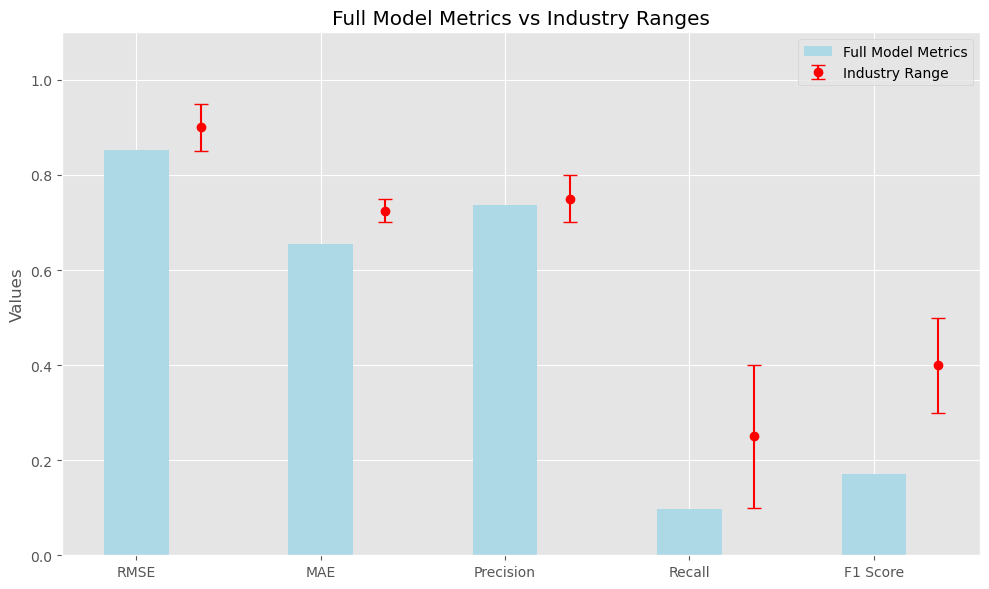

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Actual metrics obtained from the Full Model
model_metrics = {
    'RMSE': 0.853,
    'MAE': 0.654,
    'Precision': 0.736,
    'Recall': 0.097,
    'F1 Score': 0.171
}

# Ranges for industry standards (min and max)
industry_ranges = {
    'Precision': (0.70, 0.80),
    'Recall': (0.10, 0.40),
    'F1 Score': (0.30, 0.50),
    'RMSE': (0.85, 0.95),
    'MAE': (0.70, 0.75)
}

metrics = list(model_metrics.keys())
x = np.arange(len(metrics))  # label locations
bar_width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for model metrics
ax.bar(x, [model_metrics[metric] for metric in metrics], width=bar_width, color='lightblue', label='Full Model Metrics')

# Calculate means and error margins for industry standards
industry_means = [(industry_ranges[metric][0] + industry_ranges[metric][1]) / 2 for metric in metrics]
industry_errors = [(industry_ranges[metric][1] - industry_ranges[metric][0]) / 2 for metric in metrics]

# Adding error bars to indicate the range of industry standards
ax.errorbar(x + bar_width, industry_means, yerr=industry_errors, fmt='o', color='red', capsize=5, label='Industry Range')

# Adding labels, title, and custom x-axis tick labels
ax.set_ylabel('Values')
ax.set_title('Full Model Metrics vs Industry Ranges')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)  # Setting the y-limit to encompass typical ranges for these metrics
ax.legend()

plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_palette('colorblind')

In [6]:
movies_df = pd.read_csv('../data/movies.csv')

movies_df.shape

(9742, 3)

In [7]:
ratings_df = pd.read_csv('../data/ratings.csv')

ratings_df.shape

(100836, 4)

In [8]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [10]:
movies_df.describe(include='all')

,movieId,title,genres
count,9742.000000,9742,9742
unique,NaN,9737,951
top,NaN,Emma (1996),Drama
freq,NaN,2,1053
mean,42200.353623,NaN,NaN
std,52160.494854,NaN,NaN
min,1.000000,NaN,NaN
25%,3248.250000,NaN,NaN
50%,7300.000000,NaN,NaN
75%,76232.000000,NaN,NaN


In [11]:
movies_df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [12]:
movies_df.duplicated().sum()

0

In [13]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [14]:
ratings_df.describe(include='all')

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [15]:
# Merge the two df's on movieId
df = movies_df.merge(ratings_df, on='movieId')

df.shape

(100836, 6)

In [16]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [17]:
df.isna().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [19]:
df.describe(include='all')

,movieId,title,genres,userId,rating,timestamp
count,100836.000000,100836,100836,100836.000000,100836.000000,1.008360e+05
unique,NaN,9719,951,NaN,NaN,NaN
top,NaN,Forrest Gump (1994),Comedy,NaN,NaN,NaN
freq,NaN,329,7196,NaN,NaN,NaN
mean,19435.295718,NaN,NaN,326.127564,3.501557,1.205946e+09
std,35530.987199,NaN,NaN,182.618491,1.042529,2.162610e+08
min,1.000000,NaN,NaN,1.000000,0.500000,8.281246e+08
25%,1199.000000,NaN,NaN,177.000000,3.000000,1.019124e+09
50%,2991.000000,NaN,NaN,325.000000,3.500000,1.186087e+09
75%,8122.000000,NaN,NaN,477.000000,4.000000,1.435994e+09


In [20]:
df.isna().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [21]:
df.duplicated().sum()

0

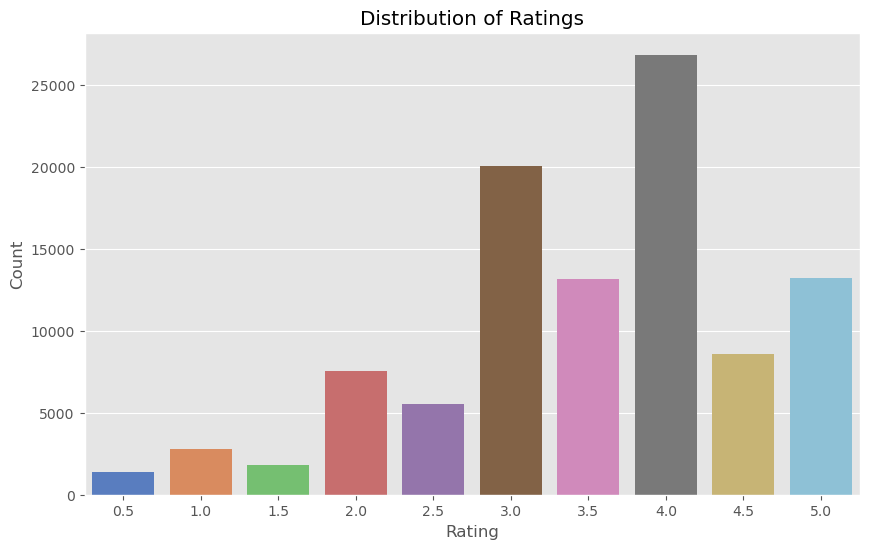

In [22]:
# Plot ratings distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', hue='rating', data=df, legend=False, palette='muted'
             )
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


C:\Users\trobb\AppData\Local\Temp\ipykernel_17412\3179706429.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(genre_counts, kind='bar', palette='muted', height=5, aspect=2)


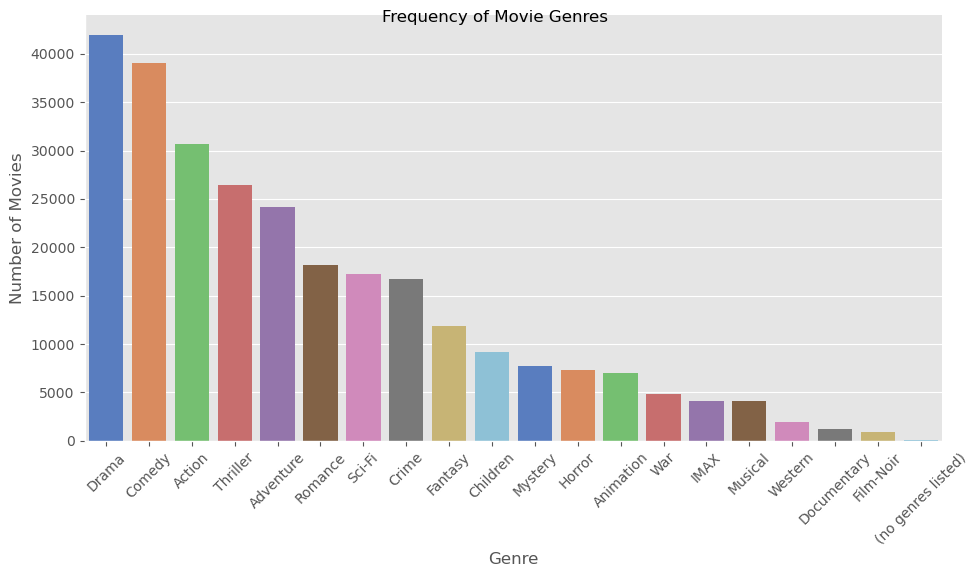

In [23]:
# split genres by | and add as a list
df['genres'] = df['genres'].apply(lambda x:x.split('|'))
                                  
df.head()

# Break out genres included in list and determine count of each
import matplotlib.pyplot as plt

# Explode the genres column to have separate row for each genre
exploded_genres = df.explode('genres')

# Count the occurrences of each genre
genre_counts = exploded_genres['genres'].value_counts()
genre_counts

# Plot the genre frequencies

g = sns.catplot(genre_counts, kind='bar', palette='muted', height=5, aspect=2)
g.fig.suptitle('Frequency of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

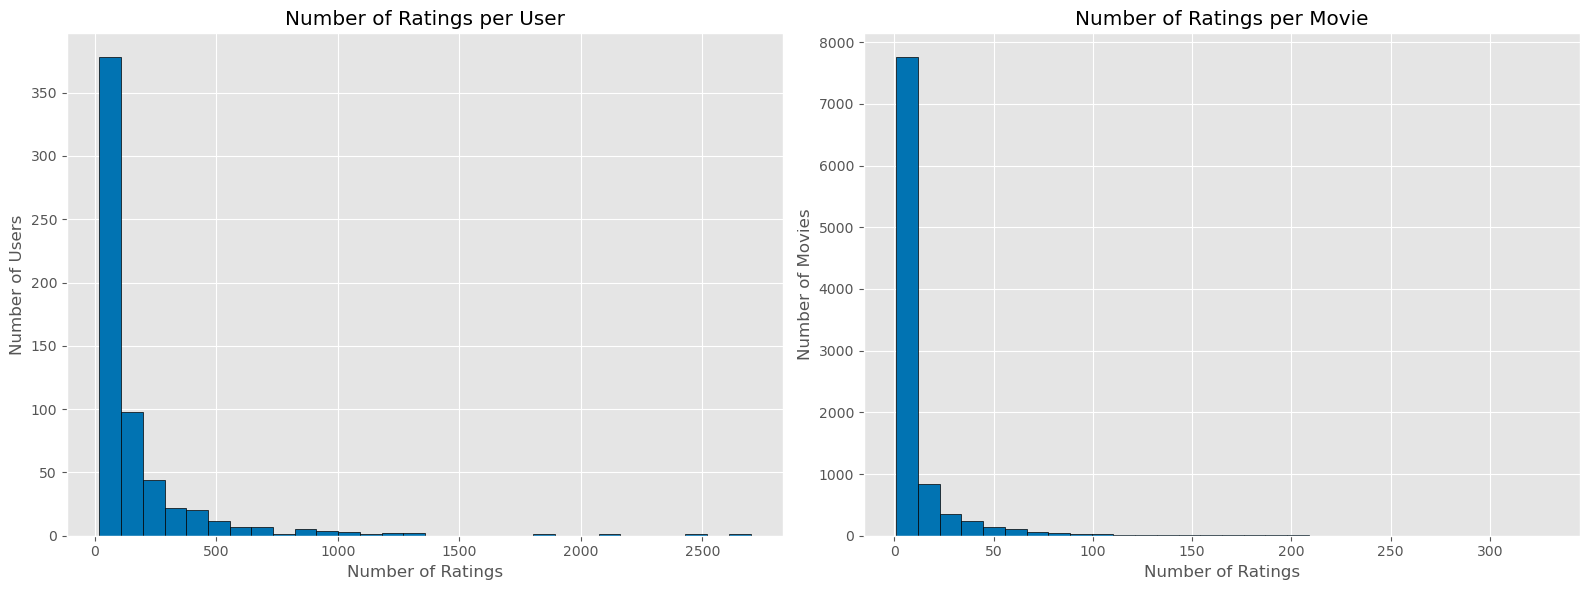

In [24]:
import matplotlib.pyplot as plt

# Assuming 'ratings_df' is your DataFrame
user_rating_counts = ratings_df['userId'].value_counts()
movie_rating_counts = ratings_df['movieId'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot for number of ratings per user
axes[0].hist(user_rating_counts, bins=30, edgecolor='black')
axes[0].set_title('Number of Ratings per User')
axes[0].set_xlabel('Number of Ratings')
axes[0].set_ylabel('Number of Users')

# Plot for number of ratings per movie
axes[1].hist(movie_rating_counts, bins=30, edgecolor='black')
axes[1].set_title('Number of Ratings per Movie')
axes[1].set_xlabel('Number of Ratings')
axes[1].set_ylabel('Number of Movies')

plt.tight_layout()
plt.show()



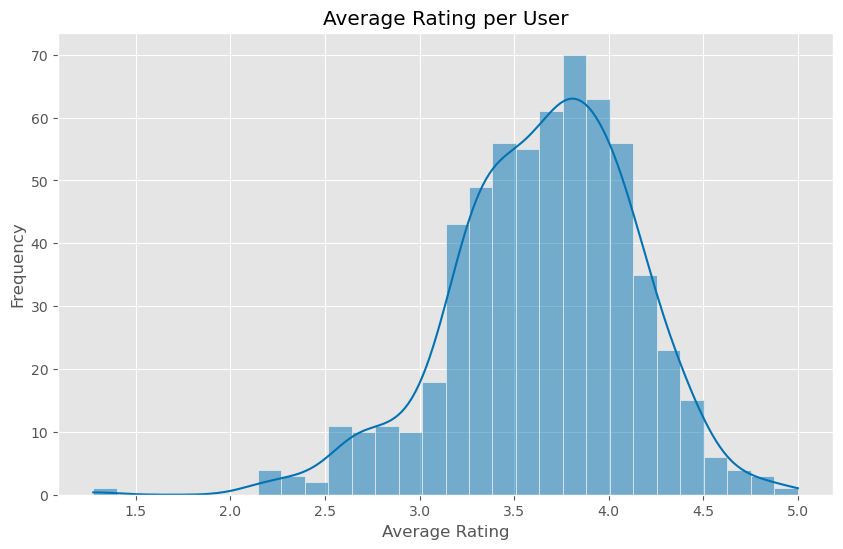

In [25]:
# Average Rating per User

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average rating per user
user_avg_ratings = ratings_df.groupby('userId')['rating'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(user_avg_ratings, bins=30, kde=True)
plt.title('Average Rating per User')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


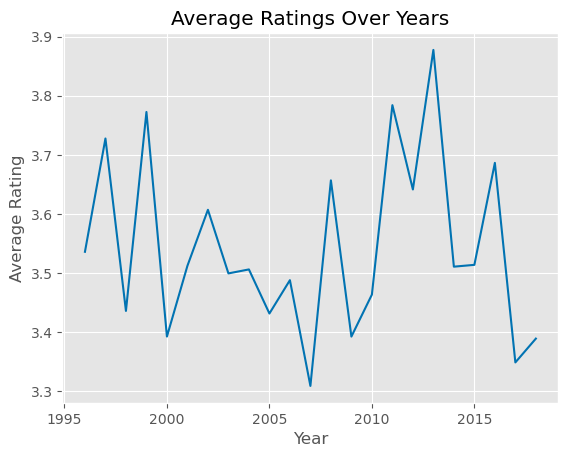

In [26]:
# Ratings over Time
ratings_df['datetime'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df['year'] = ratings_df['datetime'].dt.year
ratings_df.groupby('year')['rating'].mean().plot(kind='line')
plt.title('Average Ratings Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


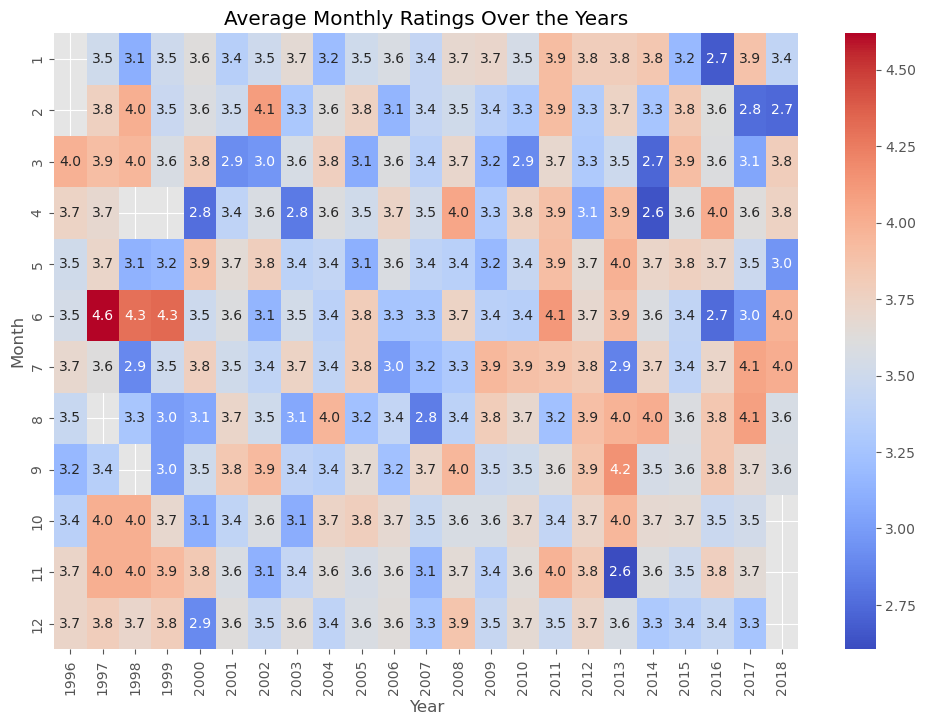

In [27]:
# Heatmap of Ratings Over Time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'timestamp' is a UNIX timestamp in 'ratings_df'
ratings_df['date'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df['year'] = ratings_df['date'].dt.year
ratings_df['month'] = ratings_df['date'].dt.month

# Pivot table to prepare data for heatmap
rating_pivot = ratings_df.pivot_table(values='rating', index='month', columns='year', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(rating_pivot, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Average Monthly Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()



In [28]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,847434962
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1106635946
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,1510577970
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,1305696483


In [29]:
# Load libraries

import pandas as pd
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import precision_score, recall_score, f1_score
from collections import defaultdict



In [30]:
# Load and merge movies and ratings data
def load_and_merge_data(movies_file, ratings_file):
    try:
        movies_df = pd.read_csv(movies_file)
        ratings_df = pd.read_csv(ratings_file)
        merged_df = pd.merge(ratings_df, movies_df, on='movieId')
        print("Data successfully merged.")
        return merged_df
    except FileNotFoundError as e:
        print(f"Error: {e}. File not found. Check the file paths.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None
    
# Preprocess data by adding one-hot encoding for genres
def preprocess_data(df):
    if 'genres' in df.columns:
        df['genres'] = df['genres'].replace('', '(no genres listed)')
        genres_dummies = df['genres'].str.get_dummies(sep='|')
        df = pd.concat([df, genres_dummies], axis=1)
        print("Genre-based features added.")
    else:
        print("Genres column not available for processing.")
    return df


# Convert the timestamp column to a readable datetime format
def convert_timestamp(df):
    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
        print("Timestamp converted to datetime format.")
    else:
        print("Timestamp column not available for conversion.")
    return df


# Add user-genre interaction features to the dataset
def add_user_genre_features(df):
    if 'userId' in df.columns:
        genre_columns = [col for col in df.columns if col.startswith('genre_')]
        user_genre_means = df.groupby(['userId'])[genre_columns].mean()
        user_genre_means.columns = [f'user_mean_{col}' for col in user_genre_means.columns]
        df = pd.merge(df, user_genre_means, on='userId', how='left')
        print("User-genre interaction features added.")
    else:
        print("UserId column not available for interaction features.")
    return df




In [31]:
# Train and evaluate the SVD model using GridSearchCV
def train_and_evaluate_svd(df):
    reader = Reader(rating_scale=(0.5, 5.0))
    data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

    trainset, testset = train_test_split(data, test_size=0.25)

    param_grid = {
        'n_factors': [50, 100, 150],
        'n_epochs': [20, 30],
        'lr_all': [0.002, 0.005],
        'reg_all': [0.02, 0.1]
    }

    gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
    gs.fit(data)

    best_rmse_model = gs.best_estimator['rmse']
    best_rmse_params = gs.best_params['rmse']
    best_rmse_model.fit(trainset)

    predictions = best_rmse_model.test(testset)
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)

    print(f"Best Parameters (RMSE): {best_rmse_params}")
    print(f"Best Model (RMSE): RMSE={rmse:.4f}, MAE={mae:.4f}")

    return best_rmse_model, testset




In [32]:
# Calculate recommendation metrics (precision, recall, and F1-score)
def calculate_recommendation_metrics(predictions, threshold=3.5):
    def get_top_n(predictions, n=10):
        top_n = defaultdict(list)
        for uid, iid, true_r, est, _ in predictions:
            top_n[uid].append((iid, est))
        for uid, user_ratings in top_n.items():
            user_ratings.sort(key=lambda x: x[1], reverse=True)
            top_n[uid] = user_ratings[:n]
        return top_n

    top_n = get_top_n(predictions)
    y_true, y_pred = [], []

    for uid, user_ratings in top_n.items():
        for iid, rating in user_ratings:
            y_true.append(1 if rating >= threshold else 0)
            y_pred.append(1)

    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

    return precision, recall, f1



In [59]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import precision_score, recall_score, f1_score
from collections import defaultdict


# Load and merge movies and ratings data with essential columns and a subset of ratings
def load_and_merge_data(movies_file, ratings_file, max_ratings=50000):
    try:
        movies_df = pd.read_csv(movies_file, usecols=['movieId', 'title', 'genres'])
        ratings_df = pd.read_csv(ratings_file, usecols=['userId', 'movieId', 'rating']).head(max_ratings)

        # Remove duplicates
        movies_df.drop_duplicates(subset=['movieId'], inplace=True)
        ratings_df.drop_duplicates(subset=['userId', 'movieId'], inplace=True)

        # Handle missing values
        movies_df.fillna({'genres': '(no genres listed)'}, inplace=True)
        ratings_df.dropna(subset=['userId', 'movieId', 'rating'], inplace=True)

        merged_df = pd.merge(ratings_df, movies_df, on='movieId')
        print("Data successfully merged and cleaned.")
        return merged_df
    except FileNotFoundError as e:
        print(f"Error: {e}. File not found. Check the file paths.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


# Preprocess data by adding one-hot encoding for genres
def preprocess_data(df):
    if 'genres' in df.columns:
        df['genres'] = df['genres'].replace('', '(no genres listed)')
        genres_dummies = df['genres'].str.get_dummies(sep='|')
        df = pd.concat([df, genres_dummies], axis=1)
        print("Genre-based features added.")
    else:
        print("Genres column not available for processing.")
    return df


# Add user-genre interaction features to the dataset
def add_user_genre_features(df):
    if 'userId' in df.columns:
        genre_columns = [col for col in df.columns if col.startswith('genre_')]
        user_genre_means = df.groupby(['userId'])[genre_columns].mean()
        user_genre_means.columns = [f'user_mean_{col}' for col in user_genre_means.columns]
        df = pd.merge(df, user_genre_means, on='userId', how='left')
        print("User-genre interaction features added.")
    else:
        print("UserId column not available for interaction features.")
    return df


# Train and evaluate the SVD model using fixed parameters
def train_and_evaluate_svd(df):
    reader = Reader(rating_scale=(0.5, 5.0))
    data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

    trainset, testset = train_test_split(data, test_size=0.25)

    svd_params = {
        'n_factors': 150,
        'n_epochs': 30,
        'lr_all': 0.005,
        'reg_all': 0.1,
        'biased': True
    }

    model = SVD(**svd_params)
    model.fit(trainset)

    predictions = model.test(testset)
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)

    print(f"Best Model (RMSE): RMSE={rmse:.4f}, MAE={mae:.4f}")

    return model, testset


# Calculate recommendation metrics (precision, recall, and F1-score)
def calculate_recommendation_metrics(predictions, threshold=4.0, n=5):
    def get_top_n(predictions, n=5):
        top_n = defaultdict(list)
        for uid, iid, true_r, est, _ in predictions:
            top_n[uid].append((iid, est))
        for uid, user_ratings in top_n.items():
            user_ratings.sort(key=lambda x: x[1], reverse=True)
            top_n[uid] = user_ratings[:n]
        return top_n

    top_n = get_top_n(predictions, n)
    y_true, y_pred = [], []

    for uid, user_ratings in top_n.items():
        for iid, rating in user_ratings:
            y_true.append(1 if rating >= threshold else 0)
            y_pred.append(1)

    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

    return precision, recall, f1


# Hybrid recommendation function combining SVD and content-based filtering
def hybrid_recommendation(df, svd_model, test_users, weight_svd=0.7, weight_content=0.3, n=5):
    movie_indices = pd.Series(df.index, index=df['title']).drop_duplicates()

    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['genres'].fillna(''))
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

    def hybrid_user_recommendation(user_id, title, n=5):
        if user_id not in test_users:
            raise ValueError(f"User ID {user_id} is not present in the test set.")

        if title not in movie_indices:
            raise ValueError(f"Movie title '{title}' is not present in the dataset.")

        idx = movie_indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sorted_indices = np.argsort([x[1] for x in sim_scores])[::-1][1:11]
        movie_indices_list = [sim_scores[i][0] for i in sorted_indices if i < len(sim_scores)]

        sim_movies = df['movieId'].iloc[movie_indices_list]
        svd_recs = [svd_model.predict(user_id, iid) for iid in sim_movies]

        # Combine scores with weights
        recommendations = [
            (iid, weight_svd * est.est + weight_content * cosine_sim[idx][1])
            for idx, (iid, est) in enumerate(svd_recs)
        ]

        recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)

        return recommendations[:n]

    return hybrid_user_recommendation


# Example Usage
movies_file = '../data/movies.csv'
ratings_file = '../data/ratings.csv'

augmented_ratings_df = load_and_merge_data(movies_file, ratings_file, max_ratings=50000)

if augmented_ratings_df is not None:
    augmented_ratings_df = preprocess_data(augmented_ratings_df)
    augmented_ratings_df = add_user_genre_features(augmented_ratings_df)
else:
    print("Data loading failed, preprocessing not performed.")

best_svd_model, svd_testset = train_and_evaluate_svd(augmented_ratings_df)

# Get prediction results and evaluate
svd_predictions = best_svd_model.test(svd_testset)
calculate_recommendation_metrics(svd_predictions, threshold=4.0, n=5)

# Extract unique test users from predictions
test_users = {pred.uid for pred in svd_predictions}

# Hybrid Recommendation Example
hybrid_recommender = hybrid_recommendation(augmented_ratings_df, best_svd_model, test_users, n=5)
hybrid_recommender(1, 'Toy Story (1995)', n=5)


Data successfully merged and cleaned.
Genre-based features added.
User-genre interaction features added.
RMSE: 0.8898
MAE:  0.6849
Best Model (RMSE): RMSE=0.8898, MAE=0.6849
Precision: 0.5272, Recall: 1.0000, F1-Score: 0.6904


MemoryError: Unable to allocate 18.6 GiB for an array with shape (50000, 50000) and data type float64

In [ ]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import precision_score, recall_score, f1_score
from collections import defaultdict


# Load and merge movies and ratings data with essential columns and a subset of ratings
def load_and_merge_data(movies_file, ratings_file, max_ratings=50000):
    try:
        movies_df = pd.read_csv(movies_file, usecols=['movieId', 'title', 'genres'])
        ratings_df = pd.read_csv(ratings_file, usecols=['userId', 'movieId', 'rating', 'timestamp']).head(max_ratings)

        # Remove duplicates
        movies_df.drop_duplicates(subset=['movieId'], inplace=True)
        ratings_df.drop_duplicates(subset=['userId', 'movieId'], inplace=True)

        # Handle missing values
        movies_df.fillna({'genres': '(no genres listed)'}, inplace=True)
        ratings_df.dropna(subset=['userId', 'movieId', 'rating'], inplace=True)

        merged_df = pd.merge(ratings_df, movies_df, on='movieId')
        print("Data successfully merged and cleaned.")
        return merged_df
    except FileNotFoundError as e:
        print(f"Error: {e}. File not found. Check the file paths.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


# Preprocess data by adding one-hot encoding for genres and converting timestamps
def preprocess_data(df):
    # One-hot encode genres
    if 'genres' in df.columns:
        df['genres'] = df['genres'].replace('', '(no genres listed)')
        genres_dummies = df['genres'].str.get_dummies(sep='|')
        df = pd.concat([df, genres_dummies], axis=1)
        print("Genre-based features added.")

    # Convert timestamp to datetime and extract year
    if 'timestamp' in df.columns:
        df['rating_year'] = pd.to_datetime(df['timestamp'], unit='s').dt.year
        print("Rating year feature added.")

    # Extract year from title if present
    def extract_year(title):
        year = title.strip()[-5:-1]
        return int(year) if year.isdigit() else np.nan

    if 'title' in df.columns:
        df['year'] = df['title'].apply(extract_year)
        print("Year extracted from title.")

    return df


# Add user-genre interaction and movie popularity features to the dataset
def add_features(df):
    # Add user-genre interaction features
    if 'userId' in df.columns:
        genre_columns = [col for col in df.columns if col.startswith('genre_')]
        user_genre_means = df.groupby(['userId'])[genre_columns].mean()
        user_genre_means.columns = [f'user_mean_{col}' for col in user_genre_means.columns]
        df = pd.merge(df, user_genre_means, on='userId', how='left')
        print("User-genre interaction features added.")

    # Add movie popularity features
    if 'movieId' in df.columns:
        movie_popularity = df.groupby(['movieId'])['rating'].count().rename('popularity')
        df = pd.merge(df, movie_popularity, on='movieId', how='left')
        print("Movie popularity features added.")

    return df


# Train and evaluate the SVD model using fixed parameters
def train_and_evaluate_svd(df):
    reader = Reader(rating_scale=(0.5, 5.0))
    data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

    trainset, testset = train_test_split(data, test_size=0.25)

    svd_params = {
        'n_factors': 150,
        'n_epochs': 30,
        'lr_all': 0.005,
        'reg_all': 0.1,
        'biased': True
    }

    model = SVD(**svd_params)
    model.fit(trainset)

    predictions = model.test(testset)
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)

    print(f"Best Model (RMSE): RMSE={rmse:.4f}, MAE={mae:.4f}")

    return model, trainset, testset


# Calculate recommendation metrics (precision, recall, and F1-score)
def calculate_recommendation_metrics(predictions, trainset, threshold=4.0, n=5):
    def get_top_n(predictions, n=5):
        top_n = defaultdict(list)
        for uid, iid, true_r, est, _ in predictions:
            if iid not in [x[0] for x in trainset.ur[trainset.to_inner_uid(uid)]]:
                top_n[uid].append((iid, est))
        for uid, user_ratings in top_n.items():
            user_ratings.sort(key=lambda x: x[1], reverse=True)
            top_n[uid] = user_ratings[:n]
        return top_n

    top_n = get_top_n(predictions, n)
    y_true, y_pred = [], []

    for uid, user_ratings in top_n.items():
        for iid, rating in user_ratings:
            y_true.append(1 if rating >= threshold else 0)
            y_pred.append(1)

    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

    return precision, recall, f1

from sklearn.metrics.pairwise import cosine_similarity



def hybrid_recommendation(df, svd_model, cosine_sim, test_users, n=5):
    """Provide a hybrid recommendation function combining content and collaborative filtering.
    
    Args:
        df (DataFrame): DataFrame containing movie data.
        svd_model (Model): Collaborative filtering model.
        cosine_sim (ndarray): Cosine similarity matrix.
        test_users (set): Users for whom recommendations are to be generated.
        n (int): Number of recommendations to retrieve.
    """
    def hybrid_user_recommendation(user_id, title, n=n):
        if title not in df['title'].values:
            raise ValueError(f"Title '{title}' not found in the dataset.")
        idx = df[df['title'] == title].index[0]
        
        # Find similar movies using cosine similarity
        sim_scores = list(enumerate(cosine_sim[idx]))
        sorted_indices = np.argsort([x[1] for x in sim_scores])[::-1][1:11]
        movie_indices_list = [sim_scores[i][0] for i in sorted_indices if 0 <= i < len(df)]

        sim_movies = df['movieId'].iloc[movie_indices_list]
        svd_recs = [svd_model.predict(user_id, iid) for iid in sim_movies]

        # Combine results and sort by estimated rating
        recommendations = sorted(
            [(iid, est.est) for iid, est in zip(sim_movies, svd_recs)],
            key=lambda x: x[1],
            reverse=True
        )
        return recommendations[:n]

    return hybrid_user_recommendation




# Example Usage
# Example usage:
from surprise import SVD, Dataset, Reader
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Assuming `movies_df` and `ratings_df` are already loaded and preprocessed
movies_df = pd.read_csv('../data/movies.csv')
ratings_df = pd.read_csv('../data/ratings.csv')

# Data Preparation
augmented_ratings_df = ratings_df.merge(movies_df, on='movieId')

# Creating a pivot table for cosine similarity
pivot_df = augmented_ratings_df.pivot_table(index='title', columns='userId', values='rating').fillna(0)

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(pivot_df)

# Train SVD model (example)
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
svd = SVD()
svd.fit(trainset)

# Hybrid recommendation example
test_users = {1, 2, 3}  # Replace with actual test user IDs
hybrid_recommender = hybrid_recommendation(movies_df, svd, cosine_sim, test_users, n=5)
recommendations = hybrid_recommender(1, 'Toy Story (1995)', n=5)
print(recommendations)



# PRIOR CODE:

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import precision_score, recall_score, f1_score
from collections import defaultdict


# Load and merge movies and ratings data
def load_and_merge_data(movies_file, ratings_file):
    try:
        movies_df = pd.read_csv(movies_file)
        ratings_df = pd.read_csv(ratings_file)
        merged_df = pd.merge(ratings_df, movies_df, on='movieId')
        print("Data successfully merged.")
        return merged_df
    except FileNotFoundError as e:
        print(f"Error: {e}. File not found. Check the file paths.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


# Preprocess data by adding one-hot encoding for genres
def preprocess_data(df):
    if 'genres' in df.columns:
        df['genres'] = df['genres'].replace('', '(no genres listed)')
        genres_dummies = df['genres'].str.get_dummies(sep='|')
        df = pd.concat([df, genres_dummies], axis=1)
        print("Genre-based features added.")
    else:
        print("Genres column not available for processing.")
    return df


# Convert the timestamp column to a readable datetime format
def convert_timestamp(df):
    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
        print("Timestamp converted to datetime format.")
    else:
        print("Timestamp column not available for conversion.")
    return df


# Add user-genre interaction features to the dataset
def add_user_genre_features(df):
    if 'userId' in df.columns:
        genre_columns = [col for col in df.columns if col.startswith('genre_')]
        user_genre_means = df.groupby(['userId'])[genre_columns].mean()
        user_genre_means.columns = [f'user_mean_{col}' for col in user_genre_means.columns]
        df = pd.merge(df, user_genre_means, on='userId', how='left')
        print("User-genre interaction features added.")
    else:
        print("UserId column not available for interaction features.")
    return df


# Train and evaluate the SVD model using GridSearchCV with the biased parameter
def train_and_evaluate_svd(df):
    reader = Reader(rating_scale=(0.5, 5.0))
    data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

    trainset, testset = train_test_split(data, test_size=0.25)

    param_grid = {
        'n_factors': [150],
        'n_epochs': [30],
        'lr_all': [0.005],
        'reg_all': [0.1],
        'biased': [True]
    }

    gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=2)
    gs.fit(data)

    best_rmse_model = gs.best_estimator['rmse']
    best_rmse_params = gs.best_params['rmse']
    best_rmse_model.fit(trainset)

    predictions = best_rmse_model.test(testset)
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)

    print(f"Best Parameters (RMSE): {best_rmse_params}")
    print(f"Best Model (RMSE): RMSE={rmse:.4f}, MAE={mae:.4f}")

    return best_rmse_model, predictions


# Calculate recommendation metrics (precision, recall, and F1-score)
def calculate_recommendation_metrics(predictions, threshold=4.0):
    def get_top_n(predictions, n=10):
        top_n = defaultdict(list)
        for uid, iid, true_r, est, _ in predictions:
            top_n[uid].append((iid, est))
        for uid, user_ratings in top_n.items():
            user_ratings.sort(key=lambda x: x[1], reverse=True)
            top_n[uid] = user_ratings[:n]
        return top_n

    top_n = get_top_n(predictions)
    y_true, y_pred = [], []

    for uid, user_ratings in top_n.items():
        for iid, rating in user_ratings:
            y_true.append(1 if rating >= threshold else 0)
            y_pred.append(1)

    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

    return precision, recall, f1


# Hybrid recommendation function combining SVD and content-based filtering
def hybrid_recommendation(df, svd_model, test_users, weight_svd=0.7, weight_content=0.3):
    movie_indices = pd.Series(df.index, index=df['title']).drop_duplicates()

    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['genres'].fillna(''))
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

    def get_content_recommendations(title, cosine_sim=cosine_sim):
        idx = movie_indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]
        movie_indices = [i[0] for i in sim_scores]
        return df['title'].iloc[movie_indices]

    def hybrid_user_recommendation(user_id, title, n=10):
        if user_id not in test_users:
            raise ValueError(f"User ID {user_id} is not present in the test set.")

        idx = movie_indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]
        movie_indices = [i[0] for i in sim_scores]

        sim_movies = df['movieId'].iloc[movie_indices]
        svd_recs = [svd_model.predict(user_id, iid) for iid in sim_movies]

        # Combine scores with weights
        recommendations = [
            (iid, weight_svd * est.est + weight_content * cosine_sim[idx][1])
            for idx, (iid, est) in enumerate(svd_recs)
        ]

        recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)

        return recommendations[:n]

    return hybrid_user_recommendation


# Example Usage
movies_file = '../data/movies.csv'
ratings_file = '../data/ratings.csv'

augmented_ratings_df = load_and_merge_data(movies_file, ratings_file)

if augmented_ratings_df is not None:
    augmented_ratings_df = preprocess_data(augmented_ratings_df)
    augmented_ratings_df = convert_timestamp(augmented_ratings_df)
    augmented_ratings_df = add_user_genre_features(augmented_ratings_df)
else:
    print("Data loading failed, preprocessing not performed.")

best_svd_model, svd_predictions = train_and_evaluate_svd(augmented_ratings_df)

# Get prediction results and evaluate
calculate_recommendation_metrics(svd_predictions)

# Extract unique test users from predictions
test_users = {pred.uid for pred in svd_predictions}

# Hybrid Recommendation Example
hybrid_recommender = hybrid_recommendation(augmented_ratings_df, best_svd_model, test_users)
hybrid_recommender(1, 'Toy Story (1995)', n=10)


In [ ]:
from collections import defaultdict

truth = defaultdict(list)
for pred in predictions:
    uid = pred.uid  # User ID
    iid = pred.iid  # Item ID
    actual_rating = pred.r_ui  # Actual rating
    
    truth[uid].append((iid, actual_rating))



In [ ]:
from collections import defaultdict

def prepare_top_n(predictions, n=5):
    """ Prepare the top_n dictionary from prediction results. """
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est, true_r))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)  # Sort by estimated rating
        top_n[uid] = user_ratings[:n]
    return top_n


top_n = prepare_top_n(predictions, n=k)

# Check the structure of truth
print("Sample data from truth:", dict(list(truth.items())[:1]))
print("Sample data from top_n:", dict(list(top_n.items())[:1]))



In [ ]:
# Constants and setup
user_id = 456  # specify the user ID
movie_titles = movies_df.set_index('movieId')['title'].to_dict()

def print_top_k_for_user(top_n, user_id, k, movie_titles):
    """ Print the top k recommendations for a specific user, including movie titles.

    Args:
        top_n (dict): A dictionary where keys are user IDs and values are lists of tuples.
                      Each tuple contains (item ID, estimated rating, true rating).
        user_id (str): User ID for whom recommendations are to be printed.
        k (int): Number of top recommendations to retrieve.
        movie_titles (dict): A dictionary mapping item IDs to movie titles.

    """
    if user_id in top_n:
        # Retrieve up to k items for the user
        top_k_items = top_n[user_id][:k]
        print(f"Top {k} recommendations for User ID {user_id}:")

        # Iterate through the items and display required details
        for index, (item_id, estimated_rating, true_rating) in enumerate(top_k_items, start=1):
            # Fetch the title from the movie_titles dictionary
            title = movie_titles.get(item_id, "Title Unknown")
            print(f"{index}. Title: {title}, Estimated Rating: {estimated_rating}, True Rating: {true_rating}")
    else:
        print(f"No recommendations available for user {user_id}")

# Example usage
print_top_k_for_user(top_n, user_id, k, movie_titles)


In [ ]:
# augmented_ratings_df.columns

# print(augmented_ratings_df[augmented_ratings_df['userId'] == 5])
                

In [ ]:
def calculate_rmse_mae(top_n, ks):
    rmse_scores = []
    mae_scores = []
    
    for k in ks:
        actuals = []
        preds = []
        
        for uid, user_ratings in top_n.items():
            ratings_to_use = [rating for rating in user_ratings[:min(k, len(user_ratings))]]
            actuals.extend([rating[1] for rating in ratings_to_use if len(rating) == 3])
            preds.extend([rating[2] for rating in ratings_to_use if len(rating) == 3])

        #print(f"Ratings to Use: {ratings_to_use}")
        #print(f"Actuals: {actuals}")
        #print(f"Preds: {preds}")

        if actuals and preds:
            rmse = np.sqrt(mean_squared_error(actuals, preds))
            mae = mean_absolute_error(actuals, preds)
            rmse_scores.append(rmse)
            mae_scores.append(mae)
        else:
            rmse_scores.append(float('nan'))
            mae_scores.append(float('nan'))

    return ks, rmse_scores, mae_scores


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'top_n' and 'prepare_top_n' are already defined
# and 'predictions' are available from your model's output

# Generate k values using range
ks = list(range(1, 25))  # k values from 1 to 10

# Calculate RMSE and MAE for different k values
ks, rmse_scores, mae_scores = calculate_rmse_mae(top_n, ks)

# Plotting the RMSE and MAE
plt.figure(figsize=(10, 5))
plt.plot(ks, rmse_scores, 'o-', label='RMSE')
plt.plot(ks, mae_scores, 'x-', label='MAE')
plt.title('Evaluation Metrics at Different k')
plt.xlabel('k value')
plt.ylabel('Metric Score')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
def calculate_precision_recall_f1(top_n, truth, threshold=threshold):
    """ Calculate precision, recall, and F1 score for the recommendation system. """
    true_positives = 0
    false_positives = 0
    all_relevants = sum(len({item[0] for item in items if item[1] >= threshold}) for items in truth.values())
    
    for uid, user_recommendations in top_n.items():
        if uid in truth:
            relevant_items = {item[0] for item in truth[uid] if item[1] >= threshold}
            recommended_items = {item[0] for item in user_recommendations}
            tp = len(relevant_items.intersection(recommended_items))
            fp = len(recommended_items - relevant_items)
            true_positives += tp
            false_positives += fp
        else:
            print(f"No truth data for user {uid}")
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / all_relevants if all_relevants > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f1

# Call the function
precision, recall, f1 = calculate_precision_recall_f1(top_n, truth, threshold)
print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


In [ ]:
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


In [ ]:
import matplotlib.pyplot as plt

# Set up the range for k values
ks = list(range(1, 11))

# Lists to store the scores for plotting
precisions = []
recalls = []
f1_scores = []

# Assuming `truth` and `predictions` are already prepared
for k in ks:
    # Prepare top_n recommendations for current k
    top_n = prepare_top_n(predictions, n=k)  # Assuming prepare_top_n modifies based on n

    # Calculate precision, recall, and F1 score
    precision, recall, f1 = calculate_precision_recall_f1(top_n, truth)

    # Append the scores to lists
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Plotting the scores
plt.figure(figsize=(12, 6))
plt.plot(ks, precisions, label='Precision', marker='o')
plt.plot(ks, recalls, label='Recall', marker='o')
plt.plot(ks, f1_scores, label='F1 Score', marker='o')
plt.title('Precision, Recall, and F1 Score at Different k')
plt.xlabel('k value')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calculate the popularity of each item
item_popularity_counts = augmented_ratings_df['movieId'].value_counts()

# Create a popularity rank, less frequent items receive a higher rank number
item_popularity_rank = {item: idx + 1 for idx, item in enumerate(sorted(item_popularity_counts.items(), key=lambda x: x[1]))}


In [ ]:
total_items = len(augmented_ratings_df['movieId'].unique())


In [ ]:
print(total_items)

In [ ]:
def calculate_novelty(predictions, movie_popularity):
    novelty_scores = []
    for pred in predictions:
        if pred.iid in movie_popularity:
            novelty_scores.append(movie_popularity[pred.iid])
        else:
            # Handle cases where movie's popularity is not available
            novelty_scores.append(0)  # You can assign a default value or handle it according to your requirements
    novelty_score_avg = sum(novelty_scores) / len(novelty_scores)
    return novelty_score_avg

movie_popularity = train_df['movieId'].value_counts().to_dict()
novelty_score = calculate_novelty(predictions, movie_popularity)
print(f"Novelty Score: {novelty_score:.3f}")


# Calculate Serendipity
def calculate_serendipity(predictions, user_history):
    # user_history is a dictionary where keys are user ids and values are lists of movie ids the user has interacted with
    serendipity_scores = []
    for pred in predictions:
        user_movies = user_history.get(pred.uid, [])
        serendipity_scores.append(len(set(user_movies).intersection(set([pred.iid]))) == 0)
    serendipity_score_avg = sum(serendipity_scores) / len(serendipity_scores)
    return serendipity_score_avg

# Assuming you have user history available as a dictionary
user_history = train_df.groupby('userId')['movieId'].apply(list).to_dict()
serendipity_score = calculate_serendipity(predictions, user_history)
print(f"Serendipity Score: {serendipity_score:.3f}")

# Calculate Diversity
def calculate_diversity(predictions):
    unique_movies = set([pred.iid for pred in predictions])
    diversity_score = len(unique_movies) / len(predictions)
    return diversity_score

diversity_score = calculate_diversity(predictions)
print(f"Diversity Score: {diversity_score:.3f}")

# Calculate Coverage
def calculate_coverage(predictions, total_items):
    unique_movies = set([pred.iid for pred in predictions])
    coverage_score = len(unique_movies) / total_items
    return coverage_score

total_items = len(movie_popularity)
coverage_score = calculate_coverage(predictions, total_items)
print(f"Coverage Score: {coverage_score:.3f}")

# Calculate Personalization
def calculate_personalization(predictions, user_history):
    user_recommendations = {}
    for pred in predictions:
        user_recommendations.setdefault(pred.uid, set()).add(pred.iid)
    similarity_sum = 0
    for user1, movies1 in user_recommendations.items():
        for user2, movies2 in user_recommendations.items():
            if user1 != user2:
                similarity = len(movies1.intersection(movies2)) / (len(movies1) + len(movies2))
                similarity_sum += similarity
    personalization_score = 1 - (similarity_sum / len(user_recommendations))
    return personalization_score

personalization_score = calculate_personalization(predictions, user_history)
print(f"Personalization Score: {personalization_score:.3f}")


In [ ]:
import math

def calculate_dcg(rel, k):
    dcg = 0
    for i in range(min(k, len(rel))):
        dcg += rel[i] / (math.log2(i + 2))
    return dcg

def calculate_idcg(rel, k):
    rel_sorted = sorted(rel, reverse=True)  # Sort relevance scores in descending order
    return calculate_dcg(rel_sorted, k)

# Example relevance scores and depth of evaluation
rel = [0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]  # Relevance scores of recommended items
k = 10  # Depth of evaluation

# Calculate DCG and IDCG
dcg = calculate_dcg(rel, k)
idcg = calculate_idcg(rel, k)

print("DCG:", dcg)
print("IDCG:", idcg)

# Calculate NDCG (Normalized Discounted Cumulative Gain)
ndcg = dcg / idcg
print("NDCG:", ndcg)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Extract actual and predicted ratings from the list of Prediction objects
actual_ratings = [pred.r_ui for pred in predictions]
predicted_ratings = [pred.est for pred in predictions]

# Define the ratings scale
rating_scale = np.arange(0.5, 5.5, 0.5)

# Map ratings to discrete labels
rating_labels = {rate: i for i, rate in enumerate(rating_scale)}

def map_ratings_to_labels(ratings, rating_labels):
    # Ensure ratings are rounded to the nearest valid scale entry and mapped to labels
    return [rating_labels[np.round(rate * 2) / 2] for rate in ratings]

# Apply the mapping function to actual and predicted ratings
predicted_labels = map_ratings_to_labels(predicted_ratings, rating_labels)
actual_labels = map_ratings_to_labels(actual_ratings, rating_labels)

# Compute the confusion matrix using mapped labels
cm = confusion_matrix(actual_labels, predicted_labels, labels=list(rating_labels.values()))

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rating_scale, yticklabels=rating_scale)
plt.title('Confusion Matrix for Ratings')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to create a confusion matrix for a scale from 1.0 to 5.0 in increments of 1.0
def create_confusion_matrix(actual_ratings, predicted_ratings):
    num_classes = 5
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(actual_ratings, predicted_ratings):
        true_idx = int(true - 1)  # Convert true rating to 0-based index
        pred_idx = int(pred - 1)  # Convert predicted rating to 0-based index
        cm[true_idx][pred_idx] += 1
    return cm

# Compute the confusion matrix
cm = create_confusion_matrix(actual_ratings, predicted_ratings)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.arange(1.0, 6.0, 1.0), yticklabels=np.arange(1.0, 6.0, 1.0))
plt.xlabel('Predicted Rating')
plt.ylabel('True Rating')
plt.title('Confusion Matrix')
plt.show()




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to create a confusion matrix for a scale from 1.0 to 5.0 in increments of 1.0
def create_confusion_matrix(actual_ratings, predicted_ratings):
    num_classes = 5
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(actual_ratings, predicted_ratings):
        true_idx = int(true - 1)  # Convert true rating to 0-based index
        pred_idx = int(pred - 1)  # Convert predicted rating to 0-based index
        cm[true_idx][pred_idx] += 1
    return cm

# Compute the confusion matrix
cm = create_confusion_matrix(actual_ratings, predicted_ratings)

# Round fractional values up to the nearest integer
cm_rounded_up = np.ceil(cm).astype(int)  # Convert to integers

# Plot the confusion matrix with rounded values
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rounded_up, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.arange(1.0, 6.0, 1.0), yticklabels=np.arange(1.0, 6.0, 1.0))
plt.xlabel('Predicted Rating')
plt.ylabel('True Rating')
plt.title('Confusion Matrix (Rounded Up)')
plt.show()



In [ ]:
# its rare for dcg and idcg to be the same!

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(actual_ratings, predicted_ratings)
print("R² Score: {:.3f}".format(r2))


In [ ]:
# Error analysis
errors = [pred.est - pred.r_ui for pred in predictions]
plt.figure(figsize=(10, 5))
plt.hist(errors, bins=30, edgecolor='black', color='lightgreen')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split, GridSearchCV
from collections import defaultdict
import matplotlib.pyplot as plt

# Assuming the following setup has been done and predictions were obtained:
# your existing setup code goes here

# Calculate prediction errors
errors = [pred.est - pred.r_ui for pred in predictions]

# Calculate the 2.5th and 97.5th percentiles
lower_bound, upper_bound = np.percentile(errors, [2.5, 97.5])

# Plotting the histogram of prediction errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, color='green', alpha=0.75)
plt.axvline(x=lower_bound, color='red', linestyle='--', label='2.5th Percentile')
plt.axvline(x=upper_bound, color='blue', linestyle='--', label='97.5th Percentile')
plt.title('Distribution of Prediction Errors with Percentile Lines')
plt.xlabel('Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Actual metrics obtained from the Full Model
model_metrics = {
    'RMSE': rmse,    # As reported
    'MAE': mae,     # As reported
    'Precision': precision,  # As reported
    'Recall': recall,     # As reported
    'F1 Score': f1    # As reported
}

# Ranges for industry standards (min and max)
industry_ranges = {
    'RMSE': (0.85, 0.95),       # Min and max RMSE in industry
    'MAE': (0.70, 0.75),         # Min and max MAE in industry
    'Precision': (0.70, 0.80),  # Min and max precision in industry
    'Recall': (0.10, 0.40),     # Min and max recall in industry
    'F1 Score': (0.30, 0.50),   # Min and max F1 score in industry
}

metrics = list(model_metrics.keys())
x = np.arange(len(metrics))  # label locations
bar_width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for model metrics
ax.bar(x, [model_metrics[metric] for metric in metrics], width=bar_width, color='lightblue', label='Model Metrics')

# Calculate means and error margins for industry standards
industry_means = [(industry_ranges[metric][0] + industry_ranges[metric][1]) / 2 for metric in metrics]
industry_errors = [(industry_ranges[metric][1] - industry_ranges[metric][0]) / 2 for metric in metrics]

# Adding error bars to indicate the range of industry standards
ax.errorbar(x, industry_means, yerr=industry_errors, fmt='o', color='red', capsize=5, label='Industry Range')

# Adding labels, title, and custom x-axis tick labels
ax.set_ylabel('Values')
ax.set_title('Model Metrics vs Industry Ranges')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)  # Setting the y-limit to encompass typical ranges for these metrics
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Actual metrics obtained from the Full Model
model_metrics = {
    'RMSE': 0.853,  # Rounded for display
    'MAE': 0.654,   # Rounded for display
    'Precision': 0.736,  # As reported
    'Recall': 0.097,     # As reported
    'F1 Score': 0.171    # As reported
}

# Ranges for industry standards (min and max)
industry_ranges = {
    'Precision': (0.70, 0.80),  # Min and max precision in industry
    'Recall': (0.10, 0.40),     # Min and max recall in industry
    'F1 Score': (0.30, 0.50),   # Min and max F1 score in industry
    'RMSE': (0.85, 0.95),       # Min and max RMSE in industry
    'MAE': (0.70, 0.75)         # Min and max MAE in industry
}

metrics = list(model_metrics.keys())
x = np.arange(len(metrics))  # label locations
bar_width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for model metrics
ax.bar(x, [model_metrics[metric] for metric in metrics], width=bar_width, color='lightblue', label='Full Model Metrics')

# Calculate means and error margins for industry standards
industry_means = [(industry_ranges[metric][0] + industry_ranges[metric][1]) / 2 for metric in metrics]
industry_errors = [(industry_ranges[metric][1] - industry_ranges[metric][0]) / 2 for metric in metrics]

# Adding error bars to indicate the range of industry standards
ax.errorbar(x + bar_width, industry_means, yerr=industry_errors, fmt='o', color='red', capsize=5, label='Industry Range')

# Adding labels, title, and custom x-axis tick labels
ax.set_ylabel('Values')
ax.set_title('Full Model Metrics vs Industry Ranges')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)  # Setting the y-limit to encompass typical ranges for these metrics
ax.legend()

plt.tight_layout()
plt.show()

